In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
glass_identification = pd.read_csv('Glass_Identification.csv')

In [61]:
column_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
glass_identification = pd.read_csv('Glass_Identification.csv', names=column_names)
print(glass_identification.head())

   Id number       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  \
0          1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   
1          2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   
2          3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   
3          4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   
4          5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   

   Type of glass  
0              1  
1              1  
2              1  
3              1  
4              1  


In [62]:
glass_identification.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [63]:
glass_identification.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [64]:
glass_identification.drop('Id number', axis=1, inplace=True)
glass_identification['Type of glass'] = glass_identification['Type of glass'].apply(lambda x: 0 if x in [1, 2, 3, 4] else 1)
print(glass_identification.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type of glass
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0              0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0              0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0              0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0              0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0              0


In [65]:
X = glass_identification.iloc[:, 1:-1]  
y = glass_identification['Type of glass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9534883720930233
Confusion Matrix:
 [[27  1]
 [ 1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.93      0.93      0.93        15

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43



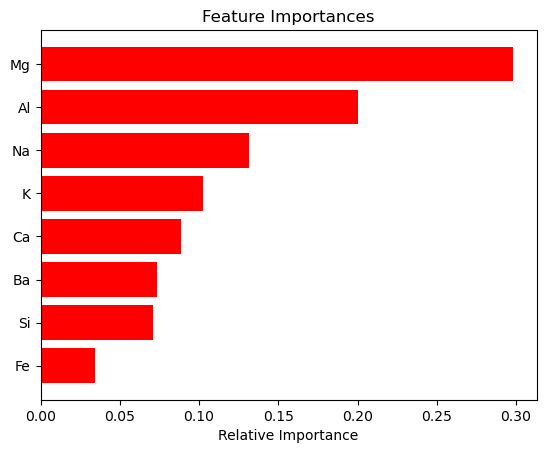

In [66]:
features = glass_identification.columns[1:-1]
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()